In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [46]:
data = pd.read_csv("C:/Users/Balraj/Desktop/02/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [48]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [49]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [50]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
cleaned_data = data.drop_duplicates()
cleaned_data.shape

(1470, 35)

In [52]:
print(data['Attrition'].value_counts(dropna=False))
# Convert 'Attrition' column to numerical
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

Attrition
No     1233
Yes     237
Name: count, dtype: int64


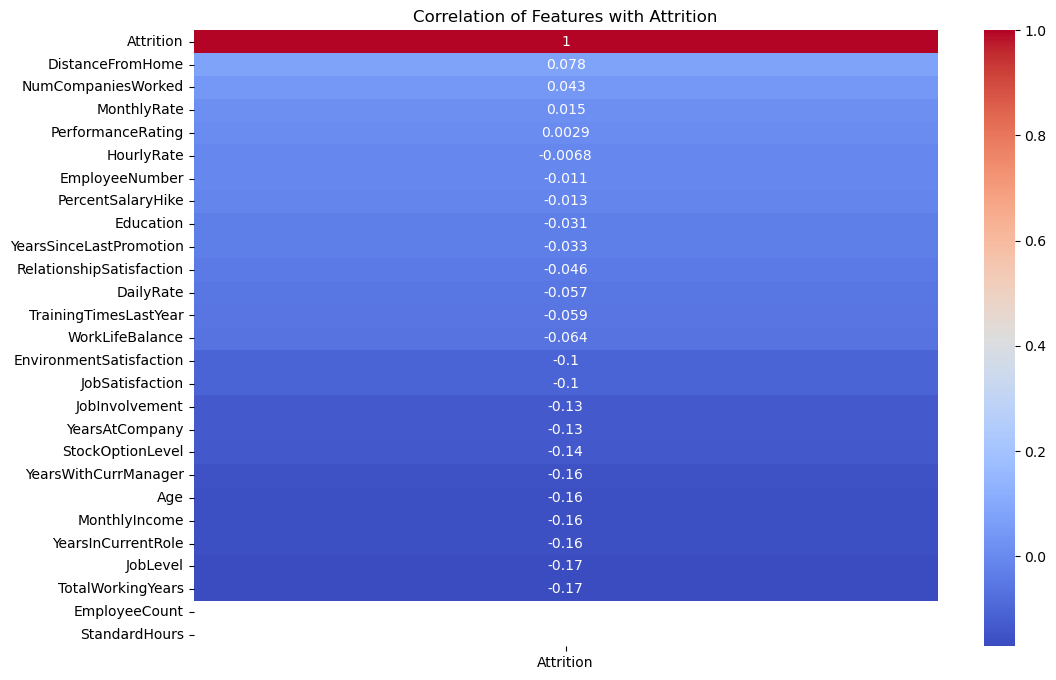

In [53]:
 #Select numeric columns
numeric_data = data.select_dtypes(include='number')

# Compute correlation
corr = numeric_data.corr()

# Plot correlation of all features with 'Attrition'
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['Attrition']].sort_values(by='Attrition', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Attrition")
plt.show()


In [54]:
drop_cols = ['DailyRate', 'HourlyRate', 'MonthlyRate', 'PerformanceRating', 
             'PercentSalaryHike', 'Education', 'RelationshipSatisfaction', 
             'YearsSinceLastPromotion', 'TrainingTimesLastYear']
data.drop(columns=drop_cols, inplace=True)

In [55]:
data_encoded = pd.get_dummies(data, drop_first=True)
# Convert Yes/No to 1/0
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
print(data['Attrition'].isna().sum())  # Should be 0

1470


In [56]:
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']
print(X.isna().sum())

Age                                  0
DistanceFromHome                     0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical 

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Train model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression
Accuracy: 0.8639455782312925
F1 Score: 0.4117647058823529
Confusion Matrix:
 [[240   7]
 [ 33  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.67      0.30      0.41        47

    accuracy                           0.86       294
   macro avg       0.77      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)  # No need to scale for Random Forest

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest
Accuracy: 0.8333333333333334
F1 Score: 0.14035087719298245
Confusion Matrix:
 [[241   6]
 [ 43   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294



In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)



LogisticRegression()

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)


RandomForestClassifier()

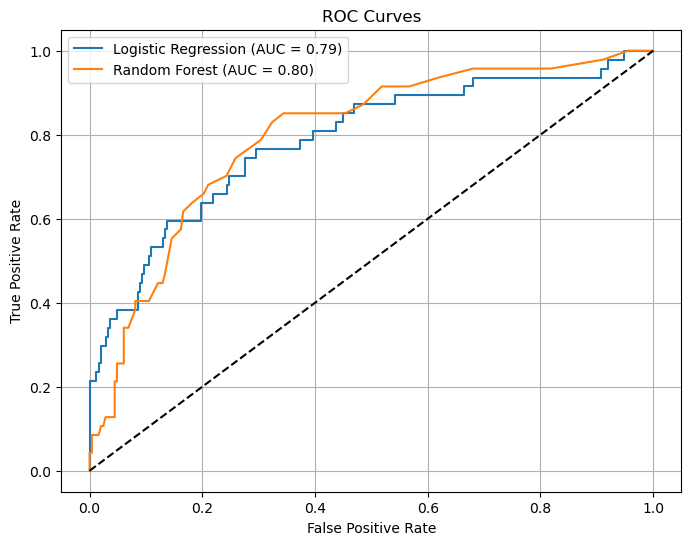

In [63]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_probs_logreg = log_reg.predict_proba(X_test_scaled)[:, 1]
y_probs_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# ROC Curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

# AUC Scores
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression (AUC = {auc_logreg:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the entire feature set (before train/test split if needed)

In [65]:
from sklearn.model_selection import cross_val_score

logreg_cv = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf_clf, X_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", logreg_cv.mean())
print("Random Forest CV Accuracy:", rf_cv.mean())


Logistic Regression CV Accuracy: 0.8829931972789116
Random Forest CV Accuracy: 0.8571428571428571


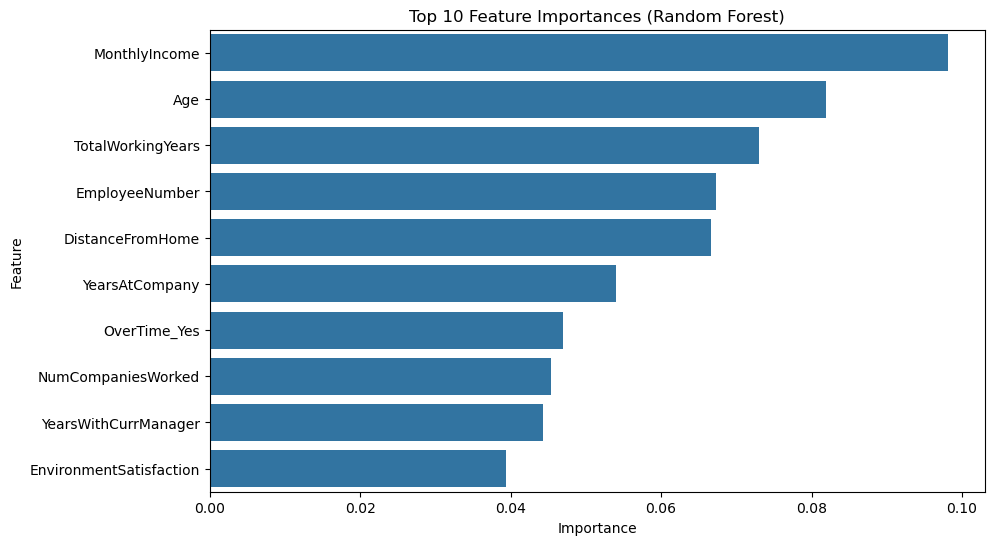

In [66]:
importances = rf_clf.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [70]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)

print("Decision Tree")
print("Accuracy:", dt_acc)
print("Precision:", dt_prec)
print("Recall:", dt_rec)


Decision Tree
Accuracy: 0.782608695652174
Precision: 0.32786885245901637
Recall: 0.3389830508474576


In [73]:
# Evaluate
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_prec = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

print("XGBoost Classifier Results:")
print("Accuracy:", round(xgb_acc * 100, 2), "%")
print("Precision:", round(xgb_prec * 100, 2), "%")
print("Recall:", round(xgb_rec * 100, 2), "%")



XGBoost Classifier Results:
Accuracy: 85.33 %
Precision: 58.06 %
Recall: 30.51 %
XGBoost Classifier Results:
Accuracy: 85.33 %
Precision: 58.06 %
Recall: 30.51 %


In [72]:
# --- 0. libraries ----------------------------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



# --- 1. split & scale ------------------------------------------------
# X, y should already be defined. If not, create them from your dataframe:
# X = df.drop('Attrition', axis=1)
# y = df['Attrition'].map({'No':0,'Yes':1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

scaler = StandardScaler()
# fit on train only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# --- 2. initialise models -------------------------------------------
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf     = RandomForestClassifier(n_estimators=200, random_state=42)
dt     = DecisionTreeClassifier(random_state=42)
xgb    = XGBClassifier(
            use_label_encoder=False,
            eval_metric="logloss",
            random_state=42
        )

models = [
    ("Logistic Regression", logreg, X_train_scaled, X_test_scaled),
    ("Random Forest",       rf,     X_train,       X_test),        # tree models don't need scaling
    ("Decision Tree",       dt,     X_train,       X_test),
    ("XGBoost",             xgb,    X_train,       X_test)
]

# --- 3. train, predict, score ---------------------------------------
rows = []
for name, model, Xtr, Xts in models:
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xts)
    rows.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred)
    ])

# --- 4. summarise & export ------------------------------------------
model_results = pd.DataFrame(
    rows, columns=["Model", "Accuracy", "Precision", "Recall"]
)

# round for neat display
model_results[["Accuracy","Precision","Recall"]] = (
    model_results[["Accuracy","Precision","Recall"]]
    .applymap(lambda x: round(x*100,2))
)

print(model_results)

model_results.to_csv("model_performance.csv", index=False)



C:\Users\Balraj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:09:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Balraj\AppData\Local\Temp\ipykernel_816\205153081.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: round(x*100,2))


                 Model  Accuracy  Precision  Recall
0  Logistic Regression     86.96      68.97   33.90
1        Random Forest     84.24      53.33   13.56
2        Decision Tree     78.26      32.79   33.90
3              XGBoost     85.33      58.06   30.51
